In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [376]:
# Specify the path to your CSV file
csv_file_path = '../../data/01-modified-data/combined_data_clean.csv'

# Use the read_csv function to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

print(df.head())

   Site  Gender    Age  Handedness   DX  ADHD Measure  ADHD Index   Verbal IQ  \
0   6.0     0.0  10.42        0.96  1.0           1.0   44.615385  115.038462   
1   6.0     1.0  10.67        1.00  1.0           1.0   44.615385  115.038462   
2   6.0     1.0  11.75        1.00  0.0           1.0   44.615385  115.038462   
3   6.0     1.0  11.08        1.00  3.0           1.0   44.615385  115.038462   
4   6.0     0.0  11.33        1.00  1.0           1.0   44.615385  115.038462   

   Performance IQ  Full4 IQ  
0      107.192308     104.0  
1      107.192308     136.0  
2      107.192308     104.0  
3      107.192308     112.0  
4      107.192308     120.0  


In [377]:
df.isnull().sum()

Site              0
Gender            0
Age               0
Handedness        0
DX                0
ADHD Measure      0
ADHD Index        0
Verbal IQ         0
Performance IQ    0
Full4 IQ          0
dtype: int64

(array([6., 3., 1., 5., 4., 8., 3., 2., 2., 2., 3., 2., 6., 1., 6., 2., 0.,
        2., 4., 3., 3., 3., 3., 1., 4., 4., 3., 3., 4., 6., 4., 3., 3., 7.,
        2., 1., 4., 3., 4., 8., 4., 1., 5., 3., 1., 2., 1., 3., 2., 3.]),
 array([ 9.57  ,  9.6294,  9.6888,  9.7482,  9.8076,  9.867 ,  9.9264,
         9.9858, 10.0452, 10.1046, 10.164 , 10.2234, 10.2828, 10.3422,
        10.4016, 10.461 , 10.5204, 10.5798, 10.6392, 10.6986, 10.758 ,
        10.8174, 10.8768, 10.9362, 10.9956, 11.055 , 11.1144, 11.1738,
        11.2332, 11.2926, 11.352 , 11.4114, 11.4708, 11.5302, 11.5896,
        11.649 , 11.7084, 11.7678, 11.8272, 11.8866, 11.946 , 12.0054,
        12.0648, 12.1242, 12.1836, 12.243 , 12.3024, 12.3618, 12.4212,
        12.4806, 12.54  ]),
 <BarContainer object of 50 artists>)

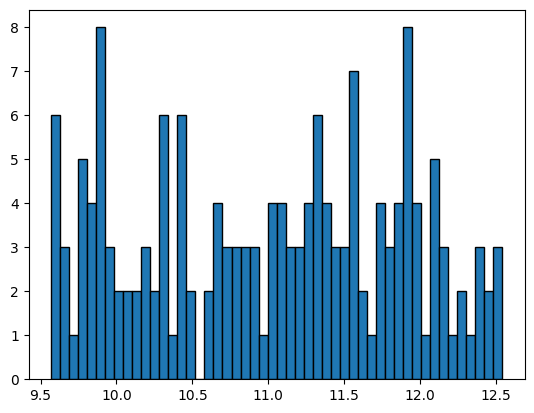

In [378]:
plt.hist(df['Age'], bins=50, edgecolor='k') 

In [379]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['ADHD Index'] = pd.to_numeric(df['ADHD Index'], errors='coerce')
df['Verbal IQ'] = pd.to_numeric(df['Verbal IQ'], errors='coerce')
df['Performance IQ'] = pd.to_numeric(df['Performance IQ'], errors='coerce')
df['Full4 IQ'] = pd.to_numeric(df['Full4 IQ'], errors='coerce')

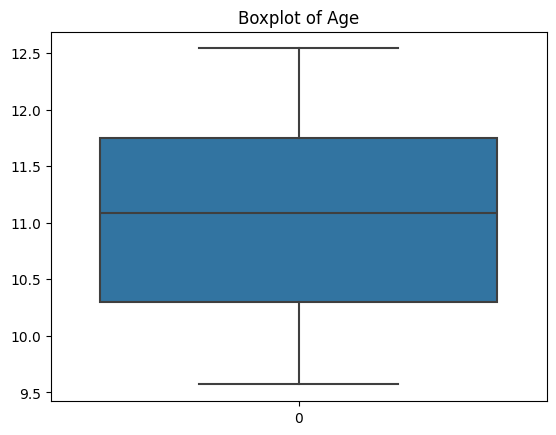

In [380]:
sns.boxplot(df['Age'])

# Set the title
plt.title('Boxplot of Age')

# Show the boxplot
plt.show()

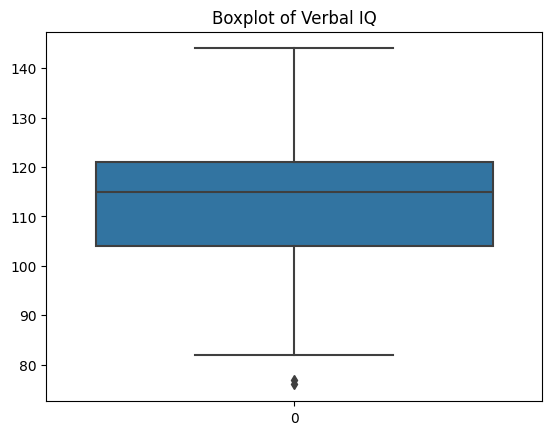

In [381]:
# dots represent outliers
sns.boxplot(df['Verbal IQ'])

# Set the title
plt.title('Boxplot of Verbal IQ')

# Show the boxplot
plt.show()

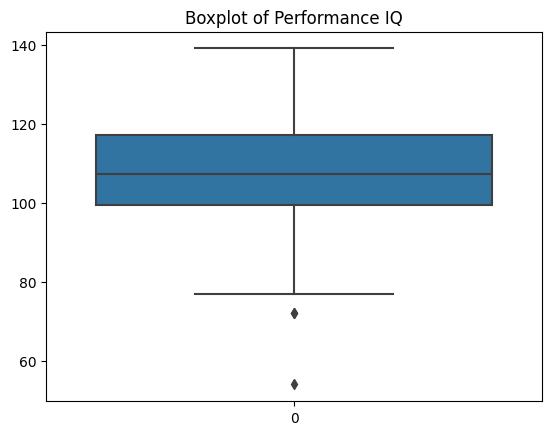

In [382]:
#Using boxplot to view outliers clearly
# dots represent outliers
sns.boxplot(df['Performance IQ'])
# Set the title
plt.title('Boxplot of Performance IQ')

# Show the boxplot
plt.show()

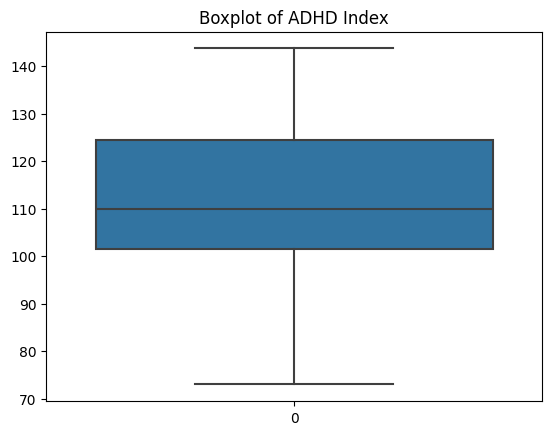

In [383]:
#Using boxplot to view outliers clearly
sns.boxplot(df['Full4 IQ'])
# Set the title
plt.title('Boxplot of ADHD Index')

# Show the boxplot
plt.show()

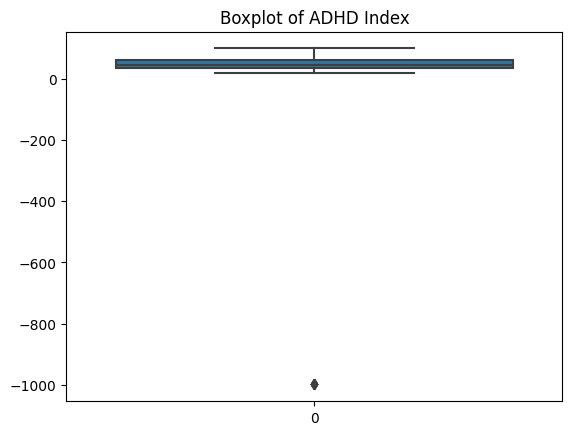

In [384]:
#Using boxplot to view outliers clearly
# dots represent outliers
sns.boxplot(df['ADHD Index'])
# Set the title
plt.title('Boxplot of ADHD Index')

# Show the boxplot
plt.show()

In [385]:
threshold = 1.5
mean = df['Age'].mean() 
std = df['Age'].std()  #Adjust this threshold as needed
df = df[(df['Age'] >= (mean - threshold)) & (df['Age'] <= (mean + threshold))]

In [386]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = df[(df['Age'] < (Q1 - threshold * IQR)) | (df['Age'] > (Q3 + threshold * IQR))]
print(outliers)

Empty DataFrame
Columns: [Site, Gender, Age, Handedness, DX, ADHD Measure, ADHD Index, Verbal IQ, Performance IQ, Full4 IQ]
Index: []


In [387]:
#Substituting the categorical variables with mode and numerical variables with mean
mode_sex = df['Gender'].mode()[0]
df['Gender'].fillna(mode_sex, inplace=True)

mode_sex = df['ADHD Index'].mean
df['ADHD Index'].fillna(mode_sex, inplace=True)

mode_sex = df['Age'].mean
df['Age'].fillna(mode_sex, inplace=True)

mode_sex = df['Site'].mode()[0]
df['Site'].fillna(mode_sex, inplace=True)

mode_sex = df['Handedness'].mode()[0]
df['Handedness'].fillna(mode_sex, inplace=True)

mode_sex = df['DX'].mode()[0]
df['DX'].fillna(mode_sex, inplace=True)

mode_sex = df['Verbal IQ'].mean
df['Verbal IQ'].fillna(mode_sex, inplace=True)

mode_sex = df['Performance IQ'].mean
df['Performance IQ'].fillna(mode_sex, inplace=True)

mode_sex = df['Full4 IQ'].mean
df['Full4 IQ'].fillna(mode_sex, inplace=True)

In [388]:
df.isnull().sum()

Site              0
Gender            0
Age               0
Handedness        0
DX                0
ADHD Measure      0
ADHD Index        0
Verbal IQ         0
Performance IQ    0
Full4 IQ          0
dtype: int64

In [389]:
#Summary statistics
df.describe()

,Site,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Verbal IQ,Performance IQ,Full4 IQ
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,3.802469,0.570038,11.002840,0.965926,0.802469,0.753086,-14.987892,112.858974,107.634378,111.956790
std,2.057676,0.495188,0.850344,0.078523,1.113662,0.590418,253.770083,13.728838,14.536080,15.233287
min,1.000000,0.000000,9.570000,0.000000,0.000000,0.000000,-999.000000,76.000000,54.000000,73.000000
25%,1.000000,0.000000,10.277500,0.960000,0.000000,0.000000,34.000000,104.000000,99.250000,101.250000
50%,5.000000,1.000000,11.085000,0.960000,0.000000,1.000000,44.615385,115.038462,107.192308,110.000000
75%,5.000000,1.000000,11.750000,1.000000,1.000000,1.000000,62.750000,121.000000,117.000000,124.750000
max,6.000000,1.000000,12.500000,1.000000,3.000000,2.000000,99.000000,144.000000,139.000000,143.700000


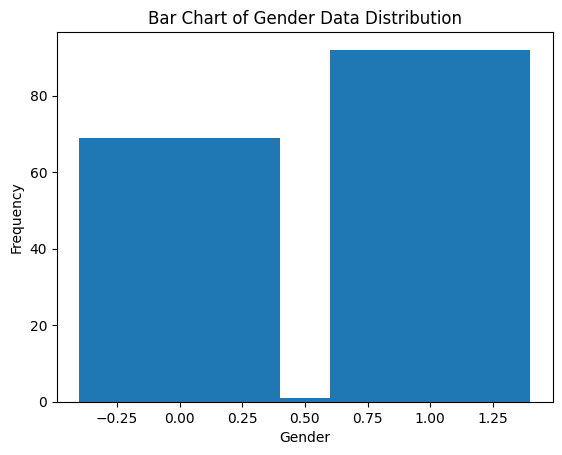

In [390]:
frequency_distribution = df['Gender'].value_counts()
plt.bar(frequency_distribution.index, frequency_distribution)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Bar Chart of Gender Data Distribution')
plt.show()

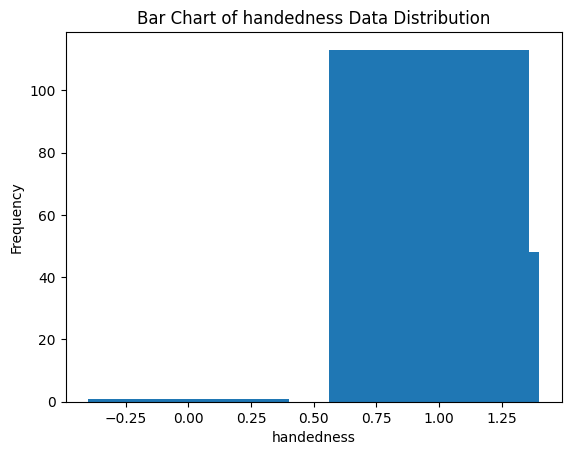

In [391]:
frequency_distribution = df['Handedness'].value_counts()
plt.bar(frequency_distribution.index, frequency_distribution)
plt.xlabel('handedness')
plt.ylabel('Frequency')
plt.title('Bar Chart of handedness Data Distribution')
plt.show()

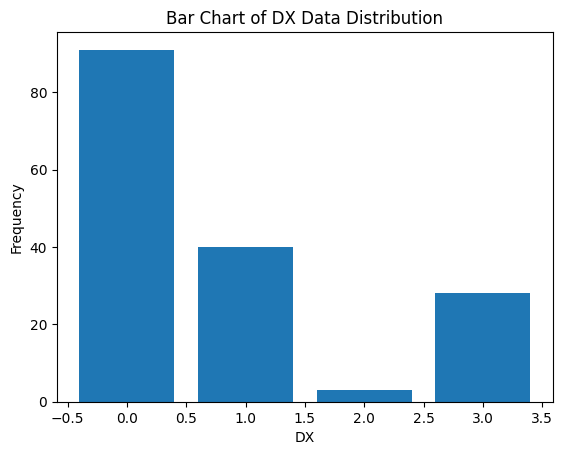

In [392]:
frequency_distribution = df['DX'].value_counts()
plt.bar(frequency_distribution.index, frequency_distribution)
plt.xlabel('DX')
plt.ylabel('Frequency')
plt.title('Bar Chart of DX Data Distribution')
plt.show()

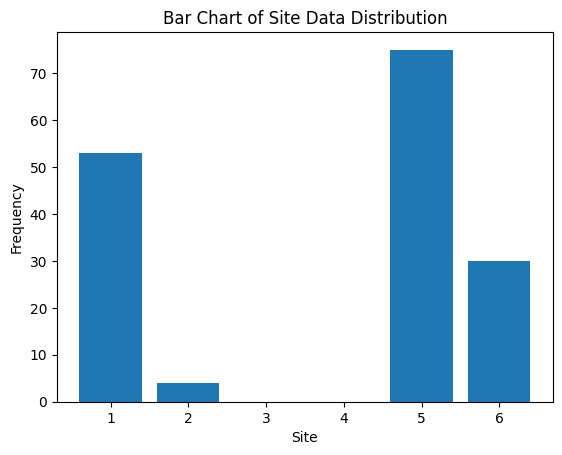

In [393]:
frequency_distribution = df['Site'].value_counts()
plt.bar(frequency_distribution.index, frequency_distribution)
plt.xlabel('Site')
plt.ylabel('Frequency')
plt.title('Bar Chart of Site Data Distribution')
plt.show()

<Axes: >

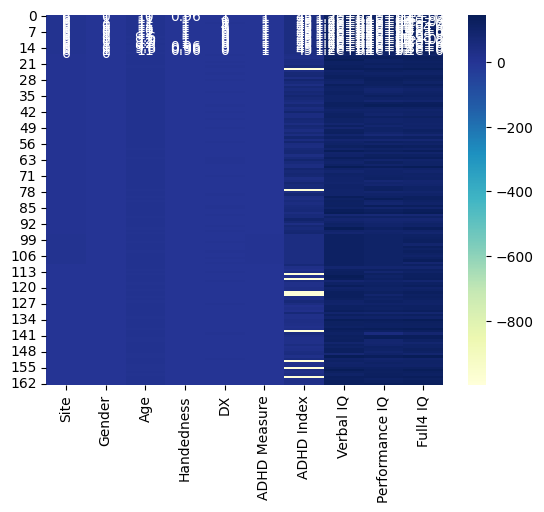

In [394]:
sns.heatmap(df, annot=True, cmap="YlGnBu")

In [395]:
#relationships between variables
#correlation matrix
# to show the correlation of every column with another one
correlation = df.corr()
correlation
#sns.heatmap()

,Site,Gender,Age,Handedness,DX,ADHD Measure,ADHD Index,Verbal IQ,Performance IQ,Full4 IQ
Site,1.000000,0.223027,0.059072,-0.057292,0.196994,0.905427,0.283784,-0.182756,-0.123383,-0.136604
Gender,0.223027,1.000000,0.120009,0.053155,0.137872,0.186983,0.084531,0.009579,0.024886,0.034834
Age,0.059072,0.120009,1.000000,-0.148715,-0.020983,0.080459,0.063948,-0.057525,-0.049930,-0.074292
Handedness,-0.057292,0.053155,-0.148715,1.000000,0.047562,-0.032550,-0.046334,0.009928,-0.076784,-0.023920
DX,0.196994,0.137872,-0.020983,0.047562,1.000000,0.227644,0.176900,-0.294907,-0.208653,-0.269607
ADHD Measure,0.905427,0.186983,0.080459,-0.032550,0.227644,1.000000,0.267590,-0.131906,-0.099239,-0.107545
ADHD Index,0.283784,0.084531,0.063948,-0.046334,0.176900,0.267590,1.000000,-0.218343,-0.149383,-0.189123
Verbal IQ,-0.182756,0.009579,-0.057525,0.009928,-0.294907,-0.131906,-0.218343,1.000000,0.554292,0.813553
Performance IQ,-0.123383,0.024886,-0.049930,-0.076784,-0.208653,-0.099239,-0.149383,0.554292,1.000000,0.801312
Full4 IQ,-0.136604,0.034834,-0.074292,-0.023920,-0.269607,-0.107545,-0.189123,0.813553,0.801312,1.000000


In [396]:
correlation["Performance IQ"]
#we can see a strong correlation between Performance.IQ and Full4.IQ

Site             -0.123383
Gender            0.024886
Age              -0.049930
Handedness       -0.076784
DX               -0.208653
ADHD Measure     -0.099239
ADHD Index       -0.149383
Verbal IQ         0.554292
Performance IQ    1.000000
Full4 IQ          0.801312
Name: Performance IQ, dtype: float64

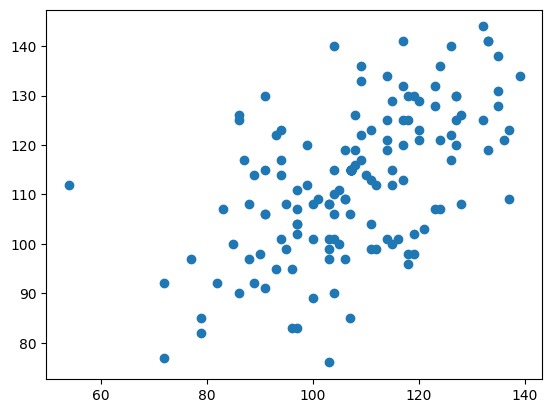

In [397]:
#poisitive relationship
plt.scatter(df['Performance IQ'], df['Verbal IQ'])

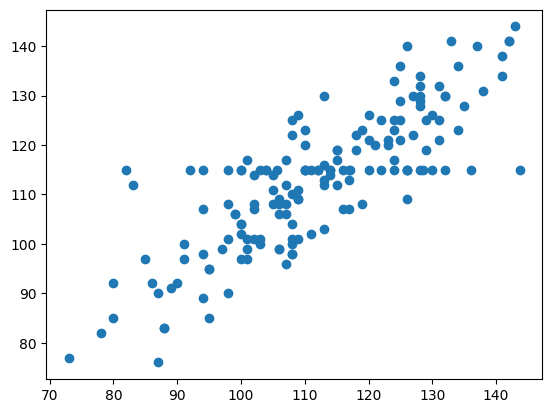

In [398]:
#strong poisitive relationship
plt.scatter(df['Full4 IQ'], df['Verbal IQ'])

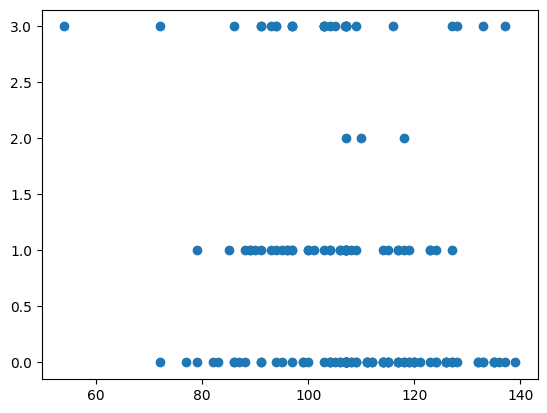

In [399]:
#no much correlation
plt.scatter(df['Performance IQ'], df['DX'])

In [400]:
df.to_csv('../../data/01-modified-data/combined_data_clean.csv', index=False)